In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dados = pd.read_csv('/content/tips.csv')

In [ ]:
dados.head(10)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


**TRADUÇÃO**

In [ ]:
renomear = {'total_bill': 'valor_da_conta',
            'tip' : 'gorjeta',
            'dessert': 'sobremesa',
            'day': 'dia_da_semana',
            'time': 'hora_do_dia',
            'size': 'total_de_pessoas'
}

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
gorjetas = dados.rename(columns = renomear)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {
    'No': 'Não',
    'Yes' : 'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dias = {'Sun': 'Domingo',
        'Sat': 'Sabado',
        'Thur': 'Quinta',
        'Fri': 'Sexta'}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {'Dinner':'Jantar',
        'Lunch': 'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [ ]:
import seaborn as sns

# Analise 1 -  Valor da conta e gorjeta

In [ ]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

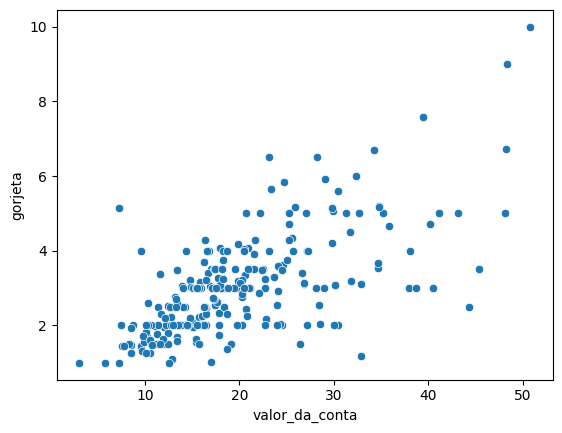

In [ ]:
valor_gorjeta = sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)

Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [ ]:
print('A base de dados contém {} registros'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros
Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta']/gorjetas['valor_da_conta']

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [ ]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


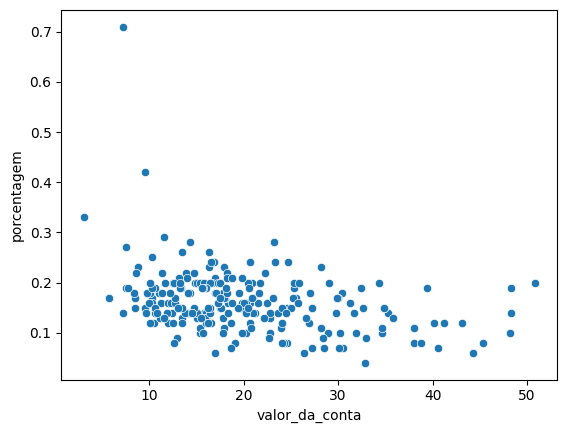

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem',data=gorjetas)

Visualmente, o grafico indica que o valor da conta não é proporcional ao valor da gorjeta

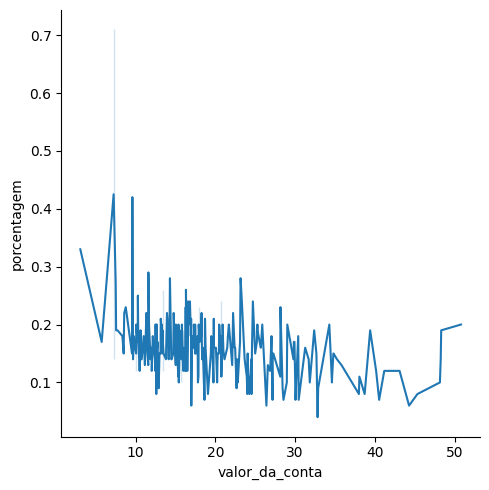

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

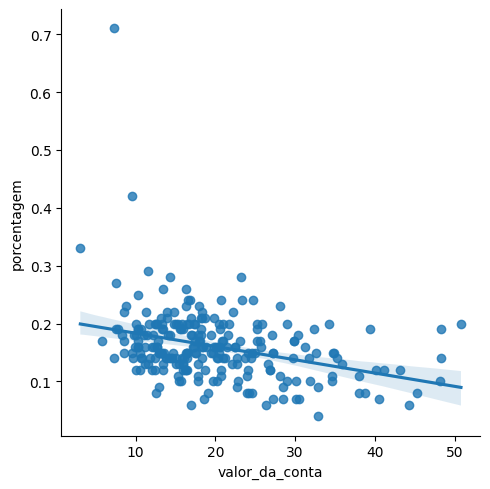

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

Outra forma de analisar

## Analise 2 - Sobremesa

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas[gorjetas.sobremesa =='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [ ]:
gorjetas[gorjetas.sobremesa =='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


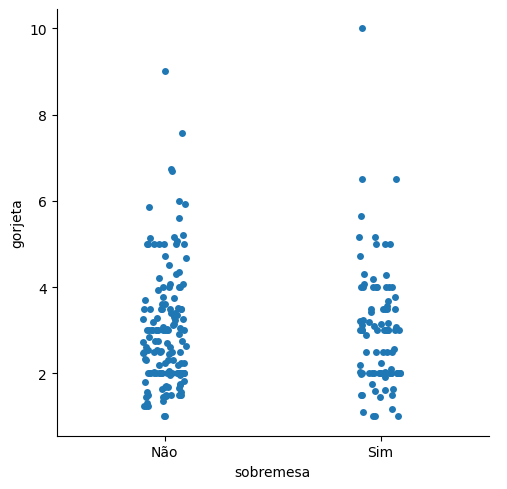

In [ ]:
sns.catplot(x='sobremesa', y='gorjeta' , data= gorjetas)

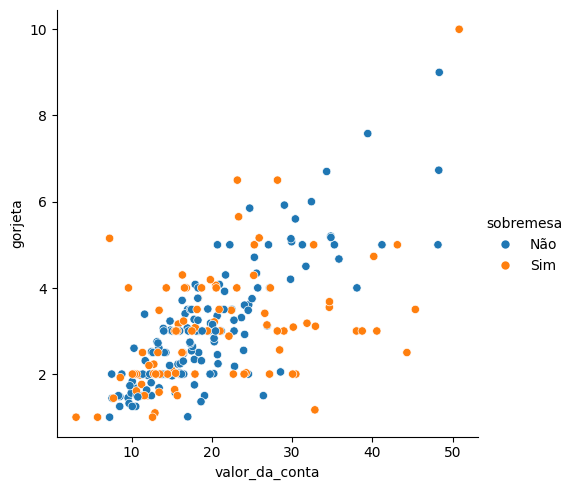

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta' , hue='sobremesa',data= gorjetas)

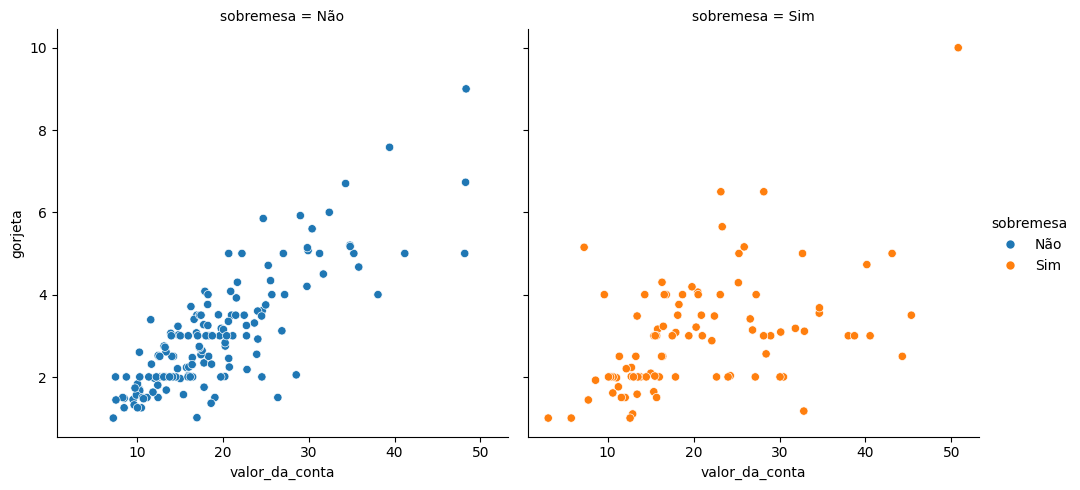

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta' , hue='sobremesa', col= 'sobremesa',data= gorjetas)

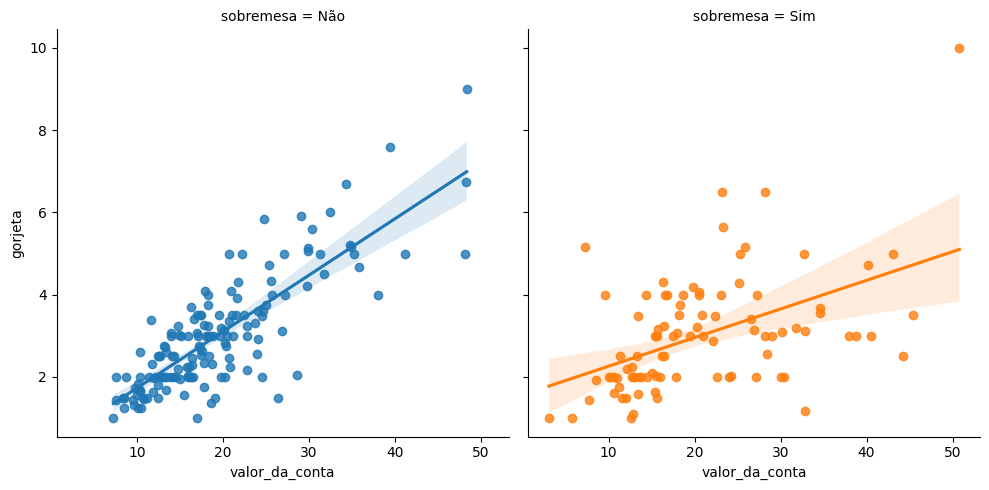

In [ ]:
sns.lmplot(x='valor_da_conta',y='gorjeta',col='sobremesa',hue='sobremesa',data=gorjetas)

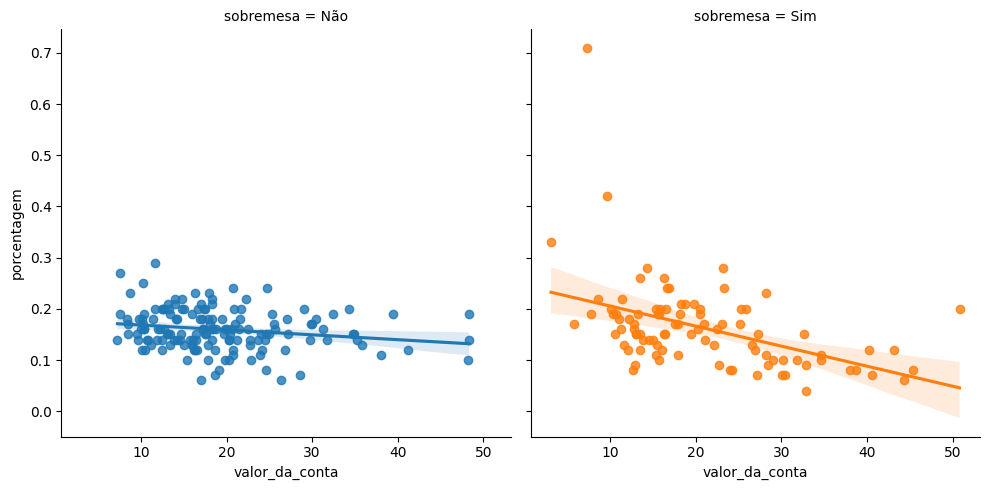

In [ ]:
sns.lmplot(x='valor_da_conta',y='porcentagem',col='sobremesa',hue='sobremesa',data=gorjetas)

## visualmente, existe uma diferença no valor da gorjeta daqueles que pedirão sobremesa e não pedirão sobremesa

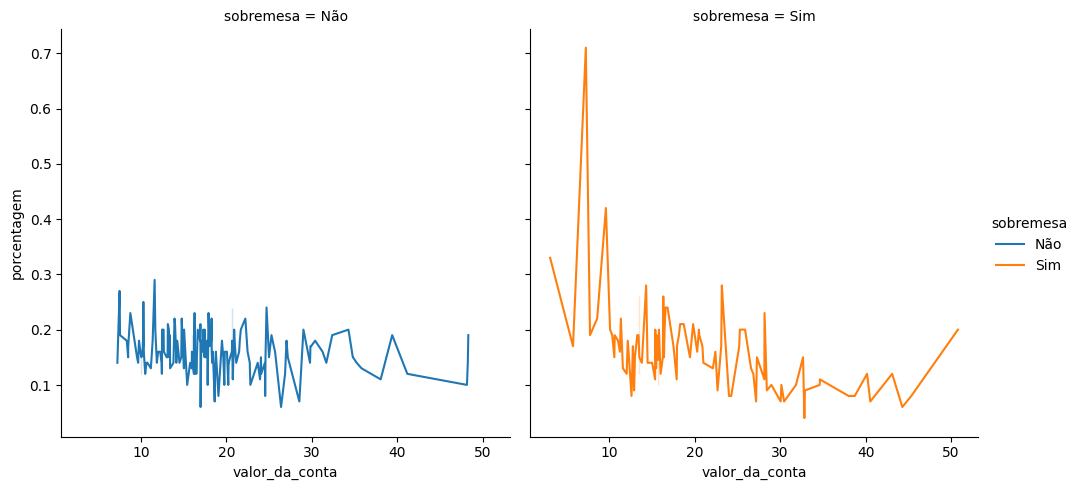

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem',col='sobremesa', hue='sobremesa', kind='line',data=gorjetas)

## Teste de hipótese

H<sup>null</sup>
> A distribuição da taxa da gorjeta é a mesma nos dois grupos

H<sup>alt</sup>
A distribuição da taxa da gorjeta é a mesma nos dois grupos

In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query("sobremesa =='Sim'").porcentagem

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa =='Não'").porcentagem

In [ ]:
r= ranksums(sobremesa, sem_sobremesa)

In [ ]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


 A distribuição da taxa da gorjeta é a mesma nos dois grupos


